In [1]:
!pip install tensorflow==2.15.0 tensorflow-hub keras==2.15.0

INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 79.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 63.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 108.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 34.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 79.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.0 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.0
    Uninstalling wrapt-1.17.0:
      Successfully uninstalled wrapt-1.17.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtype

Introduction to Natural Language Processing
* Getting the necessary doc and files

In [2]:
# !wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
# !wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/extras/helper_functions.py

In [3]:
from helper_functions import unzip_data, plot_loss_curves, create_tensorboard_callback, compare_historys
# unzip_data('nlp_getting_started.zip')

In [4]:
import pandas as pd
import numpy as np

train_data = pd.read_csv(r'train.csv')
test_data = pd.read_csv(r'test.csv')
train_data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
# shuffling the train_data
train_data = train_data.sample(frac=1, random_state=42)
train_data.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [6]:
train_data.target.value_counts()

,count
target,
0,4342
1,3271


In [7]:
len(train_data), len(test_data)

(7613, 3263)

In [8]:
import random
random_index = random.randint(0, len(train_data)-5)

for row in train_data[['text', 'target']][random_index:random_index+5].itertuples():
    _, text, target = row
    print(f"Target :{target} ", "(real diaster)" if target>0 else "(not real diseater)")
    print(f"Text :{text} \n")
    print('......\n')

Target :1  (real diaster)
Text :#Myanmar 's Displaced #Rohingya at #Sittwe point of no return http://t.co/gsa4o1mjNm Prison-like conditionsprivation http://t.co/i5ma6eWuwc 

......

Target :1  (real diaster)
Text :This fire is WAY too close wtf is going on ???? http://t.co/drf3mmRbyx 

......

Target :1  (real diaster)
Text :'I did another one I did another one. You still ain't done shit about the other one.' Nigga body bagging Meek. 

......

Target :1  (real diaster)
Text :Manuel hoping for an early Buffalo snowstorm so his accuracy improves. 

......

Target :1  (real diaster)
Text :M1.57 [01:11 UTC]?3km NNW of Lake Henshaw California. http://t.co/f9KQksoSw3 

......



Spliting data into training, testing anad validation sets

In [9]:
from sklearn.model_selection import train_test_split
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_data['text'].to_numpy(),
                                                                            train_data['target'].to_numpy(),
                                                                            test_size=0.1,
                                                                            random_state=42)

In [10]:
len(train_sentences), len(val_sentences), len(train_labels), len(val_labels)

(6851, 762, 6851, 762)

In [11]:
train_sentences[:10], train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object),
 array([0,

**converting text to numbers**
* Tokenization: direct mapping of tekens(a token could be a word or a character)
* Embedding: creating a metrix of feature vectors for each token(s)(the size of the feature vector can be define and the embedding can be learned)

In [12]:
# Tokenization
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

In [13]:
text_vectorizer = TextVectorization(max_tokens=None,
                                    standardize = 'lower_and_strip_punctuation',
                                    split = 'whitespace',
                                    ngrams= None,
                                    output_mode = 'int',
                                    output_sequence_length = None,
                                    pad_to_max_tokens = False)

In [14]:
len(train_sentences[0].split())

7

In [15]:
# finding the number of avg word in ine training sentences
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

15

In [16]:
# setting up text vectorizer
max_vocab_length = 10000
max_length = 15
text_vectorizer = TextVectorization(
    max_tokens = max_vocab_length,
    output_mode = 'int',
    output_sequence_length = max_length
)

In [17]:
text_vectorizer.adapt(train_sentences)

In [18]:
# creating a smaple sentence tokens

sentence = "This is a sample sentence statement"
text_vectorizer([sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[  19,    9,    3, 8839,    1, 2283,    0,    0,    0,    0,    0,
           0,    0,    0,    0]])>

In [19]:
# choosing the random sentence in the training set
random_sentence = random.choice(train_sentences)
print(f"Origin text: \n{random_sentence}\n")

text_vectorizer([random_sentence])

Origin text: 
Growth dries up for BHP Billiton as oil price collapse bites http://t.co/HQoD6v6DnC



<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[3800,    1,   27,   10,    1,    1,   26,  254, 1791,  155, 6095,
           1,    0,    0,    0]])>

In [20]:
# getting the unique characters in the vocabulary
word_in_vocab = text_vectorizer.get_vocabulary()
top_5 = word_in_vocab[:5]
buttom_5 = word_in_vocab[-5:]
print(len(word_in_vocab))
print(top_5)
print(buttom_5)

10000
['', '[UNK]', 'the', 'a', 'in']
['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


In [21]:
# Setting the embedding space
from tensorflow.keras.layers import Embedding
embedding = Embedding(
    input_dim = max_vocab_length,
    input_length = max_length,
    output_dim = 128
)

In [22]:
# getting random number of embedding
print(f"Original sentences :\n{random_sentence}\n")
print(f"Embedded sentences : \n")

sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original sentences :
Growth dries up for BHP Billiton as oil price collapse bites http://t.co/HQoD6v6DnC

Embedded sentences : 



<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-0.0215139 ,  0.01874835,  0.01121234, ..., -0.03270924,
          0.01725486,  0.00333474],
        [-0.02190312,  0.00985544, -0.03740629, ...,  0.01020255,
          0.04944843, -0.02435437],
        [ 0.01319042,  0.03685529,  0.00955737, ...,  0.04906845,
         -0.02945466,  0.04082309],
        ...,
        [-0.02752982, -0.03583171,  0.03104595, ..., -0.02916476,
         -0.00451183, -0.02893468],
        [-0.02752982, -0.03583171,  0.03104595, ..., -0.02916476,
         -0.00451183, -0.02893468],
        [-0.02752982, -0.03583171,  0.03104595, ..., -0.02916476,
         -0.00451183, -0.02893468]]], dtype=float32)>

In [23]:
# checking out a single token
sample_embed[0][0]

<tf.Tensor: shape=(128,), dtype=float32, numpy=
array([-0.0215139 ,  0.01874835,  0.01121234, -0.03898448,  0.02738596,
        0.04321538,  0.01930768,  0.03443289,  0.04127592, -0.00118782,
        0.03483729, -0.01827312, -0.02569857, -0.02243665, -0.00401318,
        0.00577978,  0.00926464, -0.04354323, -0.03971528, -0.00623169,
       -0.02486832,  0.03219083,  0.01508577,  0.04042255,  0.02941756,
        0.02523363, -0.031222  ,  0.01682849,  0.02840603,  0.02836725,
       -0.0250854 , -0.01752656,  0.04554057, -0.04245368,  0.03653086,
        0.02179363,  0.01089548, -0.00415621,  0.03459848,  0.00522201,
        0.00398003,  0.00051097,  0.01909006,  0.04997379, -0.02723987,
       -0.01449119, -0.03658661,  0.00550115, -0.00399053,  0.00868051,
       -0.04191529,  0.00707928, -0.02691466,  0.00304805, -0.01048697,
       -0.04787808, -0.02054858, -0.00489493,  0.00232964,  0.00139507,
       -0.03862309, -0.01777007,  0.01026253,  0.04349453,  0.03011816,
        0.012845

Modelling text datase(running a series of expperiment)
* First Baseline

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [25]:

model_0 = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', MultinomialNB())
])

# fitting the model
model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [26]:
baseline_score = model_0.score(val_sentences, val_labels)
print(f"Model 0 score: {baseline_score*100:.2f}")

Model 0 score: 79.27


In [27]:
baseline_predictions = model_0.predict(val_sentences)
baseline_predictions[:10]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0])

In [28]:
val_labels[:10]

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 0])

**creating a function to keep track of our model accuracies**
* F1 scores
* precision
* accuracy
* recall


In [29]:
# from sklearn.metrics import accuracy_score, recall, f1_score, precision
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
def calculate_accuracy(y_true, y_pred):
    model_accuracy = accuracy_score(y_true, y_pred)*100
    model_precision, model_recall, model_f1_score, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')

    model_results = {
        "model accuracy": model_accuracy,
        "model precision": model_precision*100,
        "model recall": model_recall*100,
        "model f1 score": model_f1_score*100
    }

    return model_results



In [30]:
baseline_results = calculate_accuracy(val_labels, baseline_predictions)
baseline_results

{'model accuracy': 79.26509186351706,
 'model precision': 81.11390004213173,
 'model recall': 79.26509186351706,
 'model f1 score': 78.6218975804955}

model 2 Dense model(Feed forward Neural Network)

In [31]:
logs_dir = 'model logs'

In [32]:
from tensorflow.keras import layers
model_2_embedding = layers.Embedding(input_dim = max_vocab_length,
                                     output_dim = 128,
                                     embeddings_initializer='uniform',
                                     input_length = max_length)

inputs = layers.Input(shape=(1,), dtype = tf.string)
x = text_vectorizer(inputs)
x = model_2_embedding(x)
x = tf.keras.layers.GlobalAveragePooling1D()(x)
output = tf.keras.layers.Dense(1, activation='sigmoid')(x)
model_2 = tf.keras.Model(inputs, output, name='model_2')

model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (  (None, 128)               0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1280129 (4.88 MB)
Trainable params: 1280129 (

In [33]:
from helper_functions import create_tensorboard_callback
model_2.compile(
    loss = 'binary_crossentropy',
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)



In [34]:
train_sentences.shape, train_labels.shape, val_sentences.shape, val_labels.shape

((6851,), (6851,), (762,), (762,))

In [35]:
model_2_history = model_2.fit(
    train_sentences,
    train_labels,
    epochs = 5,
    validation_data = (val_sentences, val_labels),
    callbacks = [create_tensorboard_callback(logs_dir, experiment_name = 'model_2')]
)

Saving TensorBoard log files to: model logs/model_2/20250108-184153
Epoch 1/5
215/215 [==============================] - 9s 32ms/step - loss: 0.6143 - accuracy: 0.6906 - val_loss: 0.5377 - val_accuracy: 0.7638
Epoch 2/5
215/215 [==============================] - 3s 13ms/step - loss: 0.4428 - accuracy: 0.8187 - val_loss: 0.4712 - val_accuracy: 0.7874
Epoch 3/5
215/215 [==============================] - 2s 10ms/step - loss: 0.3466 - accuracy: 0.8618 - val_loss: 0.4566 - val_accuracy: 0.7887
Epoch 4/5
215/215 [==============================] - 2s 7ms/step - loss: 0.2845 - accuracy: 0.8908 - val_loss: 0.4650 - val_accuracy: 0.7874
Epoch 5/5
215/215 [==============================] - 1s 6ms/step - loss: 0.2379 - accuracy: 0.9111 - val_loss: 0.4796 - val_accuracy: 0.7808


In [36]:
model_2.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 3ms/step - loss: 0.4796 - accuracy: 0.7808


[0.4795824885368347, 0.7808399200439453]

In [37]:
model_2_pred_prop = model_2.predict(val_sentences)
model_2_pred_prop.shape

24/24 [==============================] - 0s 2ms/step


(762, 1)

In [38]:
model_2_pred_prop[:10]

array([[0.3534239 ],
       [0.8422099 ],
       [0.9978872 ],
       [0.15602724],
       [0.11852818],
       [0.94232255],
       [0.92632353],
       [0.99225885],
       [0.9703316 ],
       [0.35795036]], dtype=float32)

In [39]:
val_labels[:10]

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 0])

In [40]:
# model prediction propability to labels
model_pred = tf.squeeze(tf.round(model_2_pred_prop))
model_pred[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [41]:
model_2_results = calculate_accuracy(val_labels, model_pred.numpy())
model_2_results

{'model accuracy': 78.08398950131233,
 'model precision': 78.41274438015813,
 'model recall': 78.08398950131233,
 'model f1 score': 77.82630349987988}

In [42]:
import numpy as np
np.array(list(model_2_results.values())) > np.array(list(baseline_results.values()))

array([False, False, False, False])

Visualizing the embedding

In [43]:
word_in_vocab = text_vectorizer.get_vocabulary()
print(len(word_in_vocab))
word_in_vocab[-5:]

10000


['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']

In [44]:
embed_weights = model_2.get_layer('embedding_1').get_weights()[0]
embed_weights

array([[ 0.00428071,  0.04051171, -0.05427308, ...,  0.00071754,
        -0.02835692, -0.01114652],
       [ 0.04160987,  0.03181261, -0.00314892, ..., -0.00999387,
        -0.0018021 ,  0.0266466 ],
       [ 0.05101232,  0.01662475,  0.00082247, ..., -0.05350596,
         0.02065995,  0.02348039],
       ...,
       [-0.02854087, -0.00259965,  0.01810836, ...,  0.02871987,
        -0.01538217, -0.03614918],
       [ 0.05042224, -0.00227099, -0.04292974, ..., -0.05587057,
        -0.0093185 ,  0.02166811],
       [ 0.02226654, -0.0684352 , -0.09188297, ..., -0.03290149,
         0.02836289,  0.03668438]], dtype=float32)

In [45]:
import io
out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

for index, word in enumerate(word_in_vocab):
  if index == 0:
    continue  # skip 0, it's padding.
  vec = embed_weights[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()

model 3(Recurrent neural networks)

In [46]:
model_3_embedding = layers.Embedding(input_dim = max_vocab_length,
                                     output_dim = 128,
                                     embeddings_initializer='uniform',
                                     input_length = max_length)

inputs = tf.keras.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = model_3_embedding(x)
# x = layers.LSTM(64, return_sequences=True)(x) // for stacking multiple rrn(S)
x = layers.LSTM(64)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model_3 = tf.keras.Model(inputs, outputs,name="model_3")
model_3.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_2 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1329473 (5.07 MB)
Trainable params: 1329473 (5.07 MB)
Non-trainable params: 0 (0.00 Byte)
_____________________

In [47]:
# compiling the model
model_3.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [48]:
# fittng the model
model_3.fit(
    train_sentences,
    train_labels,
    epochs= 5,
    validation_data = (val_sentences, val_labels),
    callbacks = [create_tensorboard_callback(logs_dir, experiment_name='model_3')]
)

Saving TensorBoard log files to: model logs/model_3/20250108-184212
Epoch 1/5
215/215 [==============================] - 11s 42ms/step - loss: 0.5135 - accuracy: 0.7472 - val_loss: 0.4552 - val_accuracy: 0.7861
Epoch 2/5
215/215 [==============================] - 2s 9ms/step - loss: 0.3118 - accuracy: 0.8739 - val_loss: 0.4911 - val_accuracy: 0.7690
Epoch 3/5
215/215 [==============================] - 2s 9ms/step - loss: 0.2154 - accuracy: 0.9175 - val_loss: 0.5259 - val_accuracy: 0.7808
Epoch 4/5
215/215 [==============================] - 2s 9ms/step - loss: 0.1510 - accuracy: 0.9445 - val_loss: 0.5930 - val_accuracy: 0.7717
Epoch 5/5
215/215 [==============================] - 2s 11ms/step - loss: 0.1081 - accuracy: 0.9616 - val_loss: 0.8586 - val_accuracy: 0.7598


In [49]:
model_3_pred_prop = model_3.predict(val_sentences)
model_3_pred = tf.squeeze(tf.round(model_3_pred_prop))
print(model_3_pred[:10])
print(val_labels[:10])

24/24 [==============================] - 1s 4ms/step
tf.Tensor([0. 1. 1. 0. 0. 1. 1. 1. 1. 0.], shape=(10,), dtype=float32)
[0 0 1 1 1 1 1 1 1 0]


In [50]:
model_3_results = calculate_accuracy(val_labels, model_3_pred.numpy())
model_3_results

{'model accuracy': 75.98425196850394,
 'model precision': 75.96935118799858,
 'model recall': 75.98425196850394,
 'model f1 score': 75.97561955559623}

Bulding a Gated Recurrent Neural Network(GRU) model

In [51]:
model_4_embedding = layers.Embedding(input_dim = max_vocab_length,
                                     output_dim = 128,
                                     embeddings_initializer='uniform',
                                     input_length = max_length)

inputs = tf.keras.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = model_4_embedding(x)
x = layers.GRU(64)(x)
# x = layers.LSTM(32, return_sequences=True)(x)
# x = layers.GRU(16, return_sequences=True)(x)
# x = layers.GRU(16)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model_4 = tf.keras.Model(inputs, outputs, name = 'model_4')

model_4.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_3 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1317313 (5.03 MB)
Trainable params: 1317313 (5.03 MB)
Non-trainable params: 0 (0.00 Byte)
_____________________

In [52]:
model_4.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [53]:
model_4_history = model_4.fit(
    train_sentences,
    train_labels,
    epochs = 5,
    validation_data = (val_sentences, val_labels),
    callbacks = [create_tensorboard_callback(logs_dir, experiment_name ='model_4')]
)

Saving TensorBoard log files to: model logs/model_4/20250108-184233
Epoch 1/5
215/215 [==============================] - 9s 33ms/step - loss: 0.5245 - accuracy: 0.7300 - val_loss: 0.4577 - val_accuracy: 0.7953
Epoch 2/5
215/215 [==============================] - 3s 15ms/step - loss: 0.3161 - accuracy: 0.8720 - val_loss: 0.5256 - val_accuracy: 0.7808
Epoch 3/5
215/215 [==============================] - 2s 10ms/step - loss: 0.2218 - accuracy: 0.9178 - val_loss: 0.5195 - val_accuracy: 0.7743
Epoch 4/5
215/215 [==============================] - 1s 7ms/step - loss: 0.1634 - accuracy: 0.9442 - val_loss: 0.6398 - val_accuracy: 0.7651
Epoch 5/5
215/215 [==============================] - 2s 7ms/step - loss: 0.1221 - accuracy: 0.9583 - val_loss: 0.6744 - val_accuracy: 0.7664


In [54]:
model_4_pred_prop=  model_4.predict(val_sentences)
model_4_pred=  tf.squeeze(tf.round(model_4_pred_prop))
model_4_pred[:5]

24/24 [==============================] - 0s 3ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0., 1., 1., 0., 0.], dtype=float32)>

In [55]:
model_4_results = calculate_accuracy(val_labels, model_4_pred.numpy())
model_4_results

{'model accuracy': 76.64041994750657,
 'model precision': 76.68867353119322,
 'model recall': 76.64041994750657,
 'model f1 score': 76.48999840928975}

In [56]:
import numpy as np
np.array(list(calculate_accuracy(val_labels, model_4_pred.numpy()).values())) > np.array(list(baseline_results.values()))

array([False, False, False, False])

Building a bidirectional RNN

In [57]:
from tensorflow.keras import layers

model_5_embedding = layers.Embedding(input_dim = max_vocab_length,
                                     output_dim = 128,
                                     embeddings_initializer='uniform',
                                     input_length = max_length)

inputs_5 = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs_5)
x = model_5_embedding(x)

x = layers.Bidirectional(layers.LSTM(64))(x)
outputs_5 = layers.Dense(1, activation='sigmoid')(x)
model_5 = tf.keras.Model(inputs_5, outputs_5, name='model_5')

In [58]:
model_5.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_4 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirection  (None, 128)               98816     
 al)                                                             
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1378945 (5.26 MB)
Trainable params: 1378945 (

In [59]:
model_5.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [60]:
model_5.fit(
    train_sentences,
    train_labels,
    epochs = 5,
    validation_data = (val_sentences, val_labels),
    callbacks = [create_tensorboard_callback(logs_dir, experiment_name ='model_5')]
)

Saving TensorBoard log files to: model logs/model_5/20250108-184256
Epoch 1/5
215/215 [==============================] - 13s 40ms/step - loss: 0.5103 - accuracy: 0.7431 - val_loss: 0.4620 - val_accuracy: 0.7900
Epoch 2/5
215/215 [==============================] - 3s 16ms/step - loss: 0.3138 - accuracy: 0.8708 - val_loss: 0.4760 - val_accuracy: 0.7835
Epoch 3/5
215/215 [==============================] - 2s 10ms/step - loss: 0.2099 - accuracy: 0.9231 - val_loss: 0.5397 - val_accuracy: 0.7756
Epoch 4/5
215/215 [==============================] - 2s 9ms/step - loss: 0.1389 - accuracy: 0.9530 - val_loss: 0.7932 - val_accuracy: 0.7507
Epoch 5/5
215/215 [==============================] - 2s 10ms/step - loss: 0.1025 - accuracy: 0.9629 - val_loss: 0.8499 - val_accuracy: 0.7598


In [61]:
model_5_pred_prop = model_5.predict(val_sentences)
model_5_pred_prop = model_5_pred_prop.reshape(-1)
model_5_pred_prop[:10]

model_5_pred = tf.squeeze(tf.round(model_5_pred_prop))

model_5_pred[:10]

24/24 [==============================] - 1s 4ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [62]:
val_labels[:10]

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 0])

In [63]:
model_5_results = calculate_accuracy(val_labels, model_5_pred.numpy())
model_5_results

{'model accuracy': 75.98425196850394,
 'model precision': 76.78846323984781,
 'model recall': 75.98425196850394,
 'model f1 score': 75.47273567379784}

Convolutional neural network for text

`* Input text => tokeniation => embedding => Conv1D layer => Pool layer => Dense layer => Output layer`


In [64]:
embedding_test = embedding(text_vectorizer(['I love deep learning']))
conv_1d = layers.Conv1D(filters=32,
                        kernel_size=5,
                        activation='relu',
                        padding='valid')
conv_1d_output = conv_1d(embedding_test)
max_pool = layers.GlobalMaxPool1D()
max_pool_output = max_pool(conv_1d_output)
embedding_test.shape, conv_1d_output.shape, max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 11, 32]), TensorShape([1, 32]))

In [65]:
# creating a Conv1D for our proble
model_6_embedding = layers.Embedding(input_dim = max_vocab_length,
                                    output_dim = 128,
                                    embeddings_initializer='uniform',
                                    input_length = max_length)

inputs_6 = layers.Input((1,), dtype=tf.string)
x = text_vectorizer(inputs_6)
x = model_6_embedding(x)
x = layers.Conv1D(filters=64,
                  kernel_size=3,
                  strides = 1,
                  activation='relu',
                  padding = 'same')(x)
x = layers.GlobalMaxPool1D()(x)
outputs_6 = layers.Dense(1, activation='sigmoid')(x)
model_6 = tf.keras.Model(inputs_6, outputs_6, name = 'model_5')
model_6.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_5 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 conv1d_1 (Conv1D)           (None, 15, 64)            24640     
                                                                 
 global_max_pooling1d_1 (Gl  (None, 64)                0         
 obalMaxPooling1D)                                               
                                                                 
 dense_4 (Dense)             (None, 1)                 65  

In [66]:
model_6.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [67]:
history_6 = model_6.fit(
    train_sentences,
    train_labels,
    epochs = 5,
    validation_data = (val_sentences, val_labels),
    callbacks = [create_tensorboard_callback(logs_dir, experiment_name ='model_6')]
)

Saving TensorBoard log files to: model logs/model_6/20250108-184321
Epoch 1/5
215/215 [==============================] - 9s 35ms/step - loss: 0.5625 - accuracy: 0.7089 - val_loss: 0.4692 - val_accuracy: 0.7848
Epoch 2/5
215/215 [==============================] - 2s 11ms/step - loss: 0.3453 - accuracy: 0.8549 - val_loss: 0.4737 - val_accuracy: 0.7940
Epoch 3/5
215/215 [==============================] - 2s 9ms/step - loss: 0.2120 - accuracy: 0.9197 - val_loss: 0.5469 - val_accuracy: 0.7940
Epoch 4/5
215/215 [==============================] - 2s 9ms/step - loss: 0.1324 - accuracy: 0.9553 - val_loss: 0.6107 - val_accuracy: 0.7795
Epoch 5/5
215/215 [==============================] - 2s 11ms/step - loss: 0.0918 - accuracy: 0.9710 - val_loss: 0.6773 - val_accuracy: 0.7822


In [68]:
model_6_pred_prop = model_6.predict(val_sentences)
model_6_pred = tf.squeeze(tf.round(model_6_pred_prop))
model_6_pred[:10]

24/24 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [69]:
model_6_results = calculate_accuracy(val_labels, model_6_pred.numpy())
model_6_results

{'model accuracy': 78.21522309711287,
 'model precision': 78.56661242905699,
 'model recall': 78.21522309711287,
 'model f1 score': 77.95215466562155}

Using a pre-trained model from tensorflow Hub


In [70]:
import tensorflow_hub as hub

In [71]:
'''
TensorFlow Hub Pretrained Sentence Encoder
The main difference between the embedding layer we created and the Universal Sentence Encoder is that rather than create a word-level embedding, the Universal Sentence Encoder, as you might've guessed, creates a whole sentence-level embedding.
'''
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder-large/5")

embed_sample = embed([random_sentence, "I love tensorflow"])
print(embed_sample[0][:10])

tf.Tensor(
[ 0.03323266 -0.08237834  0.01257793  0.02483065 -0.00319545  0.01892666
  0.00082808 -0.01304505 -0.01252148  0.027416  ], shape=(10,), dtype=float32)


In [72]:
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder-large/5",
                                        trainable = False,
                                        input_shape = [],
                                        dtype = tf.string)


In [73]:
sentence_encoder_layer

In [74]:
model_7 = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
],name  = 'model_7')


model_7.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 512)               147354880 
                                                                 
 dense_5 (Dense)             (None, 64)                32832     
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 147387777 (562.24 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 147354880 (562.11 MB)
_________________________________________________________________


In [75]:
model_7.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [76]:
history_7 = model_7.fit(
    train_sentences,
    train_labels,
    epochs = 5,
    validation_data = (val_sentences, val_labels),
    callbacks = [create_tensorboard_callback(logs_dir, experiment_name ='model_7')]
)

Saving TensorBoard log files to: model logs/model_7/20250108-184426
Epoch 1/5
215/215 [==============================] - 40s 81ms/step - loss: 0.4969 - accuracy: 0.7865 - val_loss: 0.4288 - val_accuracy: 0.8189
Epoch 2/5
215/215 [==============================] - 12s 55ms/step - loss: 0.4014 - accuracy: 0.8264 - val_loss: 0.4191 - val_accuracy: 0.8123
Epoch 3/5
215/215 [==============================] - 11s 53ms/step - loss: 0.3841 - accuracy: 0.8337 - val_loss: 0.4213 - val_accuracy: 0.8123
Epoch 4/5
215/215 [==============================] - 12s 55ms/step - loss: 0.3746 - accuracy: 0.8383 - val_loss: 0.4181 - val_accuracy: 0.8189
Epoch 5/5
215/215 [==============================] - 12s 54ms/step - loss: 0.3686 - accuracy: 0.8402 - val_loss: 0.4216 - val_accuracy: 0.8241


In [77]:
model_7_pred_prop = model_7.predict(val_sentences)
model_7_pred = tf.squeeze(tf.round(model_7_pred_prop))
model_7_pred[:10]

24/24 [==============================] - 7s 47ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [78]:
model_7_results = calculate_accuracy(val_labels, model_7_pred.numpy())
model_7_results

{'model accuracy': 82.41469816272966,
 'model precision': 82.79092037239847,
 'model recall': 82.41469816272966,
 'model f1 score': 82.234872865551}

In [79]:
baseline_results

{'model accuracy': 79.26509186351706,
 'model precision': 81.11390004213173,
 'model recall': 79.26509186351706,
 'model f1 score': 78.6218975804955}

Creating 10% of the data and clone the pre-trained model on the dataset

In [80]:
train_90_percent, train_10_percent, train_labels_90_percent, val_labels_10_percent = train_test_split(train_sentences, train_labels, test_size=0.1, random_state=42)
len(train_10_percent), len(train_sentences)

(686, 6851)

In [81]:
pd.Series(val_labels_10_percent).value_counts()

,count
0,415
1,271


In [82]:
# using the clone method from keras.model instance
model_8 = tf.keras.models.clone_model(model_7)

# compiling and fitting the model
model_8.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

model_8.fit(
    train_10_percent,
    val_labels_10_percent,
    epochs = 5,
    validation_data = (val_sentences, val_labels),
    callbacks = [create_tensorboard_callback(logs_dir, experiment_name ='model_8')]
)

Saving TensorBoard log files to: model logs/model_8/20250108-184632
Epoch 1/5
22/22 [==============================] - 30s 315ms/step - loss: 0.6668 - accuracy: 0.6968 - val_loss: 0.6424 - val_accuracy: 0.7362
Epoch 2/5
22/22 [==============================] - 2s 104ms/step - loss: 0.5915 - accuracy: 0.8090 - val_loss: 0.5805 - val_accuracy: 0.7743
Epoch 3/5
22/22 [==============================] - 3s 131ms/step - loss: 0.5106 - accuracy: 0.8382 - val_loss: 0.5184 - val_accuracy: 0.7927
Epoch 4/5
22/22 [==============================] - 2s 85ms/step - loss: 0.4425 - accuracy: 0.8499 - val_loss: 0.4811 - val_accuracy: 0.8005
Epoch 5/5
22/22 [==============================] - 2s 86ms/step - loss: 0.3955 - accuracy: 0.8586 - val_loss: 0.4610 - val_accuracy: 0.7979


In [83]:
model_8_pred_prop = model_8.predict(val_sentences)
model_8_pred = tf.squeeze(tf.round(model_8_pred_prop))
model_8_pred[:10]

24/24 [==============================] - 6s 46ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [84]:
model_8_results = calculate_accuracy(val_labels, model_8_pred.numpy())
model_8_results

{'model accuracy': 79.79002624671917,
 'model precision': 80.19860603988185,
 'model recall': 79.79002624671917,
 'model f1 score': 79.54597481027541}

In [85]:
baseline_results

{'model accuracy': 79.26509186351706,
 'model precision': 81.11390004213173,
 'model recall': 79.26509186351706,
 'model f1 score': 78.6218975804955}

# comparing all the models results

In [86]:
import pandas as pd
model_results = pd.DataFrame({
    'baseline': baseline_results,
    'model_2': model_2_results,
    'model_3': model_3_results,
    'model_4': model_4_results,
    'model_5': model_5_results,
    'model_6': model_6_results,
    'model_7': model_7_results,
    'model_8': model_8_results

})

model_results.transpose()

,model accuracy,model precision,model recall,model f1 score
baseline,79.265092,81.113900,79.265092,78.621898
model_2,78.083990,78.412744,78.083990,77.826303
model_3,75.984252,75.969351,75.984252,75.975620
model_4,76.640420,76.688674,76.640420,76.489998
model_5,75.984252,76.788463,75.984252,75.472736
model_6,78.215223,78.566612,78.215223,77.952155
model_7,82.414698,82.790920,82.414698,82.234873
model_8,79.790026,80.198606,79.790026,79.545975


Visualising the results

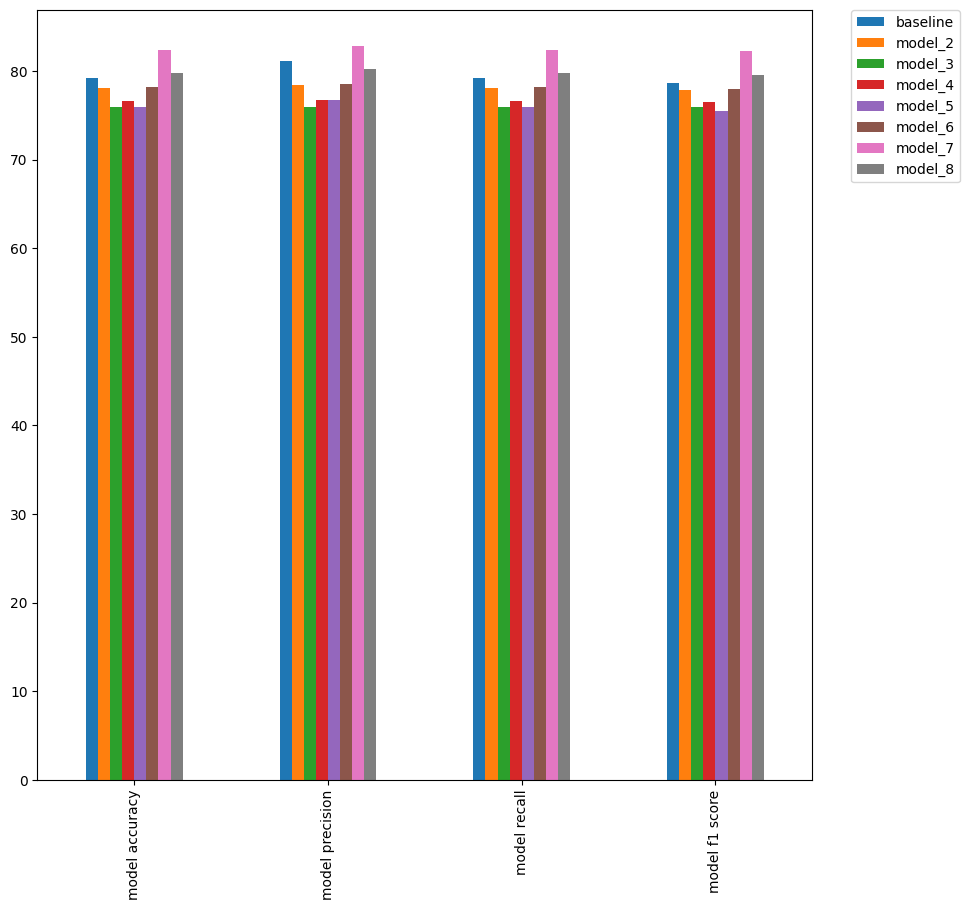

In [87]:
model_results.plot(kind='bar', figsize=(10,10)).legend(bbox_to_anchor=(1.05, 1.0), loc=2, borderaxespad=0.)

saving and loading

In [88]:
# model_7.save('model_7.h5')

# loaded_model = tf.keras.models.load_model('model_7', custom_objects={'KerasLayer':hub.KerasLayer})
# loaded_model.summary()

In [89]:
# model_8.save("model_7.saveModel_format")
# loaded_model = tf.keras.models.load_model("model_7.saveModel_format")
# loaded_model.summary()

In [90]:
# finding the most wrong prediction

results_check = pd.DataFrame({
    'Text' :val_sentences,
    'Labels' : val_labels,
    'model_7_prediction' : model_7_pred,
    'model_7_pred_prob' : tf.squeeze(model_7_pred_prop).numpy()
})

results_check.head()

,Text,Labels,model_7_prediction,model_7_pred_prob
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.229725
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.646156
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.989137
3,@camilacabello97 Internally and externally scr...,1,0.0,0.110826
4,Radiation emergency #preparedness starts with ...,1,1.0,0.671956


In [91]:
most_wrong = results_check[results_check['Labels'] != results_check['model_7_prediction']].sort_values('model_7_pred_prob', ascending=False)
most_wrong.head()

,Text,Labels,model_7_prediction,model_7_pred_prob
31,? High Skies - Burning Buildings ? http://t.co...,0,1.0,0.924207
619,Emergency Response and Hazardous Chemical Mana...,0,1.0,0.905744
49,@madonnamking RSPCA site multiple 7 story high...,0,1.0,0.875580
303,Trafford Centre film fans angry after Odeon ci...,0,1.0,0.850508
344,Air Group is here to the rescue! We have 24/7 ...,0,1.0,0.850149


In [92]:
most_wrong.tail()

,Text,Labels,model_7_prediction,model_7_pred_prob
486,VICTORINOX SWISS ARMY DATE WOMEN'S RUBBER MOP ...,1,0.0,0.035670
361,Next May I'll be free...from school from oblig...,1,0.0,0.031894
557,#download &amp; #watch Demolition Frog (2002) ...,1,0.0,0.031712
58,Leitchfield KY:\n\n Bella Edward &amp; Rosalie...,1,0.0,0.030118
38,Why are you deluged with low self-image? Take ...,1,0.0,0.027144


In [100]:
for row in most_wrong[:10].itertuples():
    _, text, Labels, model_7_prediction, model_7_pred_prop = row
    print(f"Target :{Labels} ,  Pred:{model_7_prediction}, prob: {model_7_pred_prop}")
    print(f"Text :{text} \n")
    print('......\n')

Target :0 ,  Pred:1.0, prob: 0.9242069721221924
Text :? High Skies - Burning Buildings ? http://t.co/uVq41i3Kx2 #nowplaying 

......

Target :0 ,  Pred:1.0, prob: 0.9057435989379883
Text :Emergency Response and Hazardous Chemical Management: Principles and Practices http://t.co/4sSuyhkgRB http://t.co/TDerBtgZ2k 

......

Target :0 ,  Pred:1.0, prob: 0.8755800127983093
Text :@madonnamking RSPCA site multiple 7 story high rise buildings next to low density character residential in an area that floods 

......

Target :0 ,  Pred:1.0, prob: 0.8505075573921204
Text :Trafford Centre film fans angry after Odeon cinema evacuated following false fire alarm   http://t.co/6GLDwx71DA 

......

Target :0 ,  Pred:1.0, prob: 0.8501492738723755
Text :Air Group is here to the rescue! We have 24/7 Emergency Service! Learn more about it here - http://t.co/9lyx7zMtHE http://t.co/5PbC96rTMJ 

......

Target :0 ,  Pred:1.0, prob: 0.8007780909538269
Text :Photo: postapocalypticflimflam: Prodding around the r

In [101]:
test_data.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [102]:
test_sentences = test_data['text'].to_list()
test_sentences[:10]

['Just happened a terrible car crash',
 'Heard about #earthquake is different cities, stay safe everyone.',
 'there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all',
 'Apocalypse lighting. #Spokane #wildfires',
 'Typhoon Soudelor kills 28 in China and Taiwan',
 "We're shaking...It's an earthquake",
 "They'd probably still show more life than Arsenal did yesterday, eh? EH?",
 'Hey! How are you?',
 'What a nice hat?',
 'Fuck off!']

In [103]:
test_pred_prob = model_7.predict(test_sentences)
test_pred = tf.squeeze(tf.round(test_pred_prob))
test_pred[:10]

102/102 [==============================] - 7s 65ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 1., 1., 1., 0., 0., 0., 0.], dtype=float32)>

In [121]:
# Making predictions on the test dataset
test_samples = random.sample(test_sentences, 10)
for test_sample in test_samples:
  text_samples_pred_prob = tf.squeeze(model_7.predict([test_sample])) # has to be list
  text_samples_pred = tf.round(text_samples_pred_prob)
  print(f"Pred: {int(text_samples_pred)}, Prob: {text_samples_pred_prob}")
  print(f"Text:\n{test_sample}\n")
  print("----\n")

1/1 [==============================] - 0s 63ms/step
Pred: 1, Prob: 0.6844938397407532
Text:
Holy hell the bathroom on car 649 smells like is exploded... @Metrolink

----

1/1 [==============================] - 0s 54ms/step
Pred: 0, Prob: 0.05839814618229866
Text:
I lava you

----

1/1 [==============================] - 0s 58ms/step
Pred: 0, Prob: 0.035310253500938416
Text:
School Bouta Start: 

Back To These Ignorant Ass Kids

Loud Ugly Want Be Seen Girls 

Niggas That Want Be Down

Aggravating Ass Teachers
??

----

1/1 [==============================] - 0s 63ms/step
Pred: 0, Prob: 0.07557771354913712
Text:
I'm an emotional wreck someone hold me until they upload the damn video #whatstheimportantvideo

----

1/1 [==============================] - 0s 58ms/step
Pred: 0, Prob: 0.057703886181116104
Text:
Sometimes blood ain't no thicker than water and sometimes family will bring you down quicker than strangers ???????

----

1/1 [==============================] - 0s 55ms/step
Pred: 1, Pro

In [128]:
# predicting on the wild
def Prediction_wild(model, data):
  # data = data.to_list()
  pred_wild_prob = model_7.predict([data])
  pred_wild = tf.squeeze(tf.round(pred_wild_prob))
  print(f"Pred: {pred_wild}, pred_prob: {pred_wild_prob}")
  print(f"Text: \n{data}")

In [129]:
Prediction_wild(model_7,
                "If you’re interested in Machine Learning and want to contribute to an exciting open-source project @BlackPortal_AI, join our Discord community!")

1/1 [==============================] - 0s 72ms/step
Pred: 0.0, pred_prob: [[0.04837712]]
Text: 
If you’re interested in Machine Learning and want to contribute to an exciting open-source project @BlackPortal_AI, join our Discord community!


In [131]:
Prediction_wild(model_7,
                'This explosion of dry air happens on the EXACT spot we have been seeing these radars incompletely cooking the skies for days!')

1/1 [==============================] - 0s 108ms/step
Pred: 1.0, pred_prob: [[0.92816526]]
Text: 
This explosion of dry air happens on the EXACT spot we have been seeing these radars incompletely cooking the skies for days!
